In [106]:
# おまじない
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [107]:
# 今回のパラメーター. papermillはここをいじっている
# data_path = "analysis/mdb_test_out/phenotype.xlsx"
data_path = "analysis/mdb_test_out/fuga.xlsx"

In [108]:
# データの読み込み
df_pre = pd.read_excel(data_path)
df = df_pre.drop(labels=["_id", "date", "time"], axis=1)

dates = df_pre.date.unique()

if len(dates)>1:
    sentence = "2日分以上のデータが混じっているようです。データを日付ごとに分けてください"
    HTML(f" <span style='color:red'><h2>{sentence}</h2> </span>  ")

# タイトル宣言
HTML(f" <span style='color:black'><h1>{dates[0]}に取得したデータのサマリー</h1> </span>  ")

In [77]:
# 集計のための関数を実行
func = lambda x: pd.to_numeric(x, errors="ignore").describe()

df_summary_pre = df.groupby("item_name")['value'].apply(func).reset_index().pivot(index='item_name', columns='level_1', values='value')

base = ["count", "mean", "std", "min","25%", "50%", "75%" , "max"]
extra = ["unique", "top","freq"]

# 順番を決めるための関数
order = lambda x: base+extra if (x=="unique").any() else base
order_each = lambda x: extra if (x=="unique").any() else base


df_summary = df_summary_pre.loc[:, order(df_summary_pre.columns)] 

In [110]:
HTML(f" <span style='color:black'><h2>測定項目ごとの要約統計量</h2> </span>  ")
df_summary

level_1,count,mean,std,min,25%,50%,75%,max,unique,top,freq
item_name,,,,,,,,,,,
PL,20,15.305,2.81284,10.4,13.475,15.9,17.525,19.8,None,None,None
SP,20,17.6071,3.31583,10.7364,15.8069,17.4673,19.0329,25.1506,None,None,None
fuga,5,None,None,None,None,None,None,None,1,fuga,5


/home/tomoaki_hori/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


level_1,count,mean,std,min,25%,50%,75%,max
plot_num,,,,,,,,
1,4.0,15.35,1.52,13.8,14.18,15.40,16.58,16.8
2,4.0,14.20,2.75,11.2,12.40,14.10,15.90,17.4
3,4.0,15.35,3.69,11.0,13.02,15.65,17.98,19.1
4,4.0,15.23,3.52,10.4,13.70,16.30,17.83,17.9
5,4.0,16.40,3.32,11.9,15.27,16.95,18.08,19.8


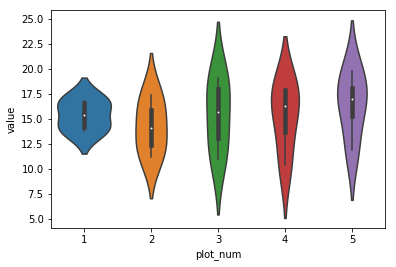

level_1,count,mean,std,min,25%,50%,75%,max
plot_num,,,,,,,,
1,4.0,18.13,4.05,15.10,16.01,16.67,18.80,24.09
2,4.0,16.58,4.12,10.74,15.22,17.86,19.22,19.86
3,4.0,16.48,2.79,13.60,14.47,16.33,18.34,19.66
4,4.0,17.61,2.13,14.46,17.36,18.43,18.69,19.12
5,4.0,19.23,4.12,16.04,16.65,17.86,20.44,25.15


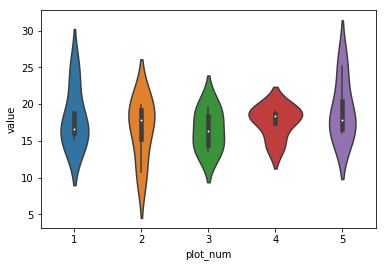

level_1,unique,top,freq
plot_num,,,
1,1,fuga,1
2,1,fuga,1
3,1,fuga,1
4,1,fuga,1
5,1,fuga,1


In [109]:
## 項目ごとにサマリーとviolinplotを作成
plot_name = "plot_num"


unique_item = df.loc[:, "item_name"].unique()

for itemi in unique_item:
    dfi = df.loc[df.item_name==itemi]
    
    sample_koho_pre = np.array(["sample_name", "random_sample_name"])
    samplenj = sample_koho_pre[np.array([(dfi.columns==i).any() for i in sample_koho_pre])][0]

    HTML(f" <span style='color:black'><h2>{itemi}のサマリー</h2> </span>  ")
    
    if (~dfi.loc[:, samplenj].isnull()).any():
        dfi.loc[:, 'value'] = pd.to_numeric(dfi['value'])
        dfi_summary_pre = dfi.groupby(plot_name)["value"].apply(func).reset_index().round(2).pivot(index=plot_name, columns='level_1', values='value')
        dfi_summary = dfi_summary_pre.loc[:, order_each(dfi_summary_pre.columns)]

        HTML(f" <span style='color:black'><h3>プロットごとの要約統計量</h3> </span>  ")
        dfi_summary
        
        HTML(f" <span style='color:black'><h3>プロットごとの分布</h3> </span>  ")
        sns.violinplot(x=plot_name, y="value", data=dfi)
        plt.show()
        plt.close()
    
    else:
        dfi_summary_pre = dfi.groupby(plot_name)["value"].apply(func).reset_index().round(2).pivot(index=plot_name, columns='level_1', values='value')
        dfi_summary = dfi_summary_pre.loc[:, order_each(dfi_summary_pre.columns)]
        HTML(f" <span style='color:black'><h3>プロットごとの要約統計量</h3> </span>  ")
        dfi_summary
            